In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.lines import Line2D
%matplotlib inline
import matplotlib.pyplot as plt
import re
from matplotlib import gridspec
from scipy.stats import gaussian_kde
import baltic as bt

from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [3]:
palms_all_variables=pd.read_csv('../data_files/palms_alltraits_curated_20220620.csv',sep='\t')
palms_all_variables.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'index', 'species',
       'coordinateUncertaintyInMeters', 'decimalLatitude', 'decimalLongitude',
       'gbifID', 'individualCount',
       ...
       'CHELSA_vpd_min_stand', 'Simard_Pinto_3DGlobalVeg_JGR_stand',
       'MaxStemHeight_m_stand', 'MaxStemDia_cm_stand', 'MaxLeafNumber_stand',
       'Max_Blade_Length_m_stand', 'Max_Rachis_Length_m_stand',
       'Max_Petiole_length_m_stand', 'StemHeightBladeLength_stand',
       'HeightOverCanopy_stand'],
      dtype='object', length=143)

In [4]:
treeFileNexus='../data_files/Clean_1_1_MCCT_nexus.nex'
cc=bt.loadNexus(treeFileNexus,absoluteTime=False,tip_regex='_([0-9\-]+)$') ## treeFile here can alternatively be a path to a local file

cc.treeStats()
cc.drawTree()
cc.sortBranches()


Tree height: 108.328870
Tree length: 18144.538310
strictly bifurcating tree
annotations present

Numbers of objects in tree: 5099 (2549 nodes and 2550 leaves)



In [5]:
tree_spp=[k.name for k in cc.getExternal()]
len(tree_spp)
intree=palms_all_variables[palms_all_variables['tip_name'].isin(tree_spp)]
intree['species']

0             Acrocomia_aculeata
1               Acrocomia_crispa
2              Acrocomia_emensis
3          Acrocomia_glaucescens
4             Acrocomia_hassleri
                  ...           
2190    Verschaffeltia_splendida
2191     Wallaceodoxa_raja-ampat
2192        Wallichia_marianneae
2193          Wallichia_triandra
2194         Wettinia_panamensis
Name: species, Length: 2071, dtype: object

In [6]:
canopy_num={'canopy':1,np.nan:np.nan,'understorey':0}
intree['UnderstoreyCanopy_num']=intree['UnderstoreyCanopy'].map(canopy_num)
intree['UnderstoreyCanopy_num'].unique()

array([ 1.,  0., nan])

In [7]:
list(intree.columns)
intree['shape'].unique()

array(['pinnate', 'entire', 'variable', 'cospalmate', 'bipinnate', nan],
      dtype=object)

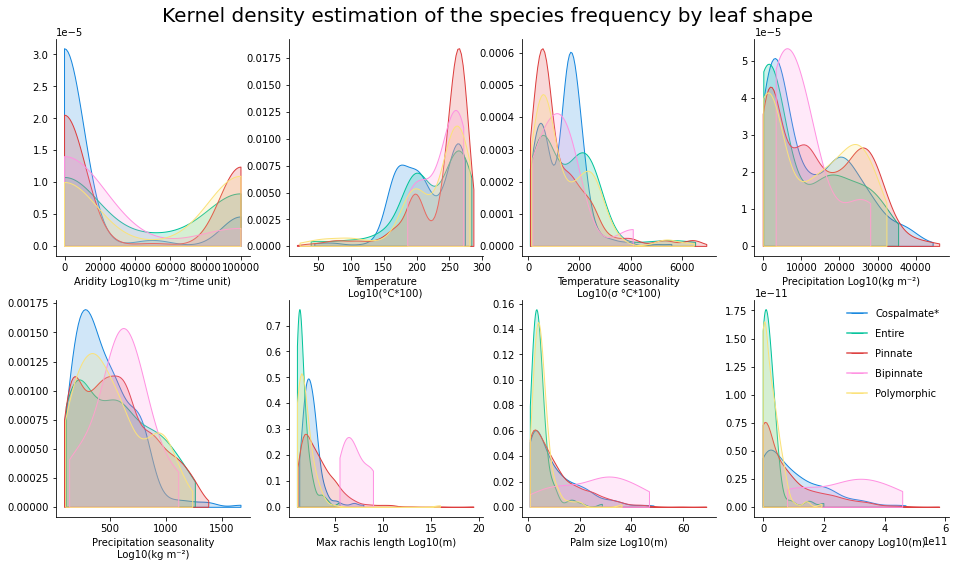

In [8]:
variables=['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
           'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']

cols=4
rows=2

fig=plt.figure(figsize=(8*(rows),2.2*(cols)),facecolor='w')
fig.suptitle('Kernel density estimation of the species frequency by leaf shape', size=20,y=0.93)
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.2, hspace=0.2) # nrows, ncols
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

shape_text_dict={'cospalmate':'Cospalmate*','entire':'Entire','pinnate':'Pinnate','variable':'Polymorphic','bipinnate':'Bipinnate'}


shape_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'bipinnate':"#ff91e2",
'variable':"#fbe279"}

edge_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'bipinnate':"#ff91e2",
'variable':"#f7ba00"}

variable_dict={'CHELSA_ai':'Aridity Log10(kg m\u207B\u00b2/time unit)',
               'CHELSA_bio1':'Temperature\nLog10(\u00B0C*100)',
               'CHELSA_bio4':'Temperature seasonality\nLog10(\u03C3 \u00B0C*100)',
               'CHELSA_bio12':u'Precipitation Log10(kg m\u207B\u00b2)',
               'CHELSA_bio15':u'Precipitation seasonality\nLog10(kg m\u207B\u00b2)',
               'Max_Rachis_Length_m':'Max rachis length Log10(m)',
               'StemHeightBladeLength': 'Palm size Log10(m)',
               'HeightOverCanopy':'Height over canopy Log10(m)'}

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    for key,value in shape_colour_dict.items():
        values=intree[intree['shape']==key][variables[xx]].dropna().astype('float').values
        kde=gaussian_kde(10**values)
        x_grid=np.linspace(min(10**values),max(10**values),100)
        ax.fill_between(x_grid,kde(x_grid),alpha=0.2,edgecolor='none',facecolor=shape_colour_dict[key],label=shape_text_dict[key])
        ax.fill_between(x_grid,kde(x_grid),alpha=1,edgecolor=shape_colour_dict[key],facecolor='none',label=shape_text_dict[key])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel('%s'%(variable_dict[variables[xx]]))
        
for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[1,xx])
    for key,value in shape_colour_dict.items():
        values=intree[intree['shape']==key][variables[xx+4]].dropna().astype('float').values
        kde=gaussian_kde(10**values)
        x_grid=np.linspace(min(10**values),max(10**values),100)
        ax.fill_between(x_grid,kde(x_grid),alpha=0.2,edgecolor='none',facecolor=shape_colour_dict[key],label=shape_text_dict[key])
        ax.fill_between(x_grid,kde(x_grid),alpha=1,edgecolor=shape_colour_dict[key],facecolor='none',label=shape_text_dict[key])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel('%s'%(variable_dict[variables[xx+4]]))
    if xx+4 == 7:
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='_',color=value,label=shape_text_dict[key],markersize=12,alpha=0.9))
        ax.legend(handles=legend_elements, loc=1,labelspacing=1,frameon=False)

# plt.savefig('../data_files/Fig_1_KDEraw_202220908.pdf',dpi=300)
plt.show()

In [9]:
intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).reset_index()

shape      CHELSA_ai  CHELSA_bio1  CHELSA_bio4  CHELSA_bio12  \
0   bipinnate       1.000000   250.959658  1365.191562   7008.107341   
1  cospalmate       1.000000   211.500000  1474.000000   8227.000000   
2      entire       1.000000   246.500000  1514.000000   2940.000000   
3     pinnate       1.000000   257.000000   750.491839  12194.983600   
4    variable  100000.025091   252.500000   836.000000  12243.000000   

   CHELSA_bio15  Max_Rachis_Length_m  StemHeightBladeLength  HeightOverCanopy  
0    623.247543             7.000000              28.622544      2.827366e+11  
1    405.000000             2.400000               7.000000      7.000000e+10  
2    521.000000             1.329962               3.819987      1.350000e+10  
3    518.499759             2.900000               7.389993      4.064997e+10  
4    481.500000             1.550000               4.614997      1.750000e+10

In [10]:
intree.groupby(by='shape')[variables].max().apply(lambda x: 10**x).reset_index()

shape      CHELSA_ai  CHELSA_bio1  CHELSA_bio4  CHELSA_bio12  \
0   bipinnate  100001.548709        272.0       4102.0       28172.5   
1  cospalmate  100003.433253        274.5       5608.5       44539.0   
2      entire  100002.855431        284.5       6536.5       35492.0   
3     pinnate  100003.976216        287.5       6973.0       46257.0   
4    variable  100002.408126        281.5       6484.0       32427.0   

   CHELSA_bio15  Max_Rachis_Length_m  StemHeightBladeLength  HeightOverCanopy  
0        1115.0                  9.0                  47.00      4.600000e+11  
1        1670.0                  8.0                  48.75      4.710000e+11  
2        1263.0                  5.5                  28.80      2.000000e+11  
3        1382.5                 19.5                  69.12      5.820000e+11  
4        1240.0                 16.0                  36.40      1.934000e+11

In [11]:
intree.groupby(by='shape')[variables].min().apply(lambda x: 10**x).reset_index()

shape  CHELSA_ai  CHELSA_bio1  CHELSA_bio4  CHELSA_bio12  \
0   bipinnate        1.0        186.5        181.0        3403.0   
1  cospalmate        1.0         44.5        109.0          96.0   
2      entire        1.0         39.0         84.0         161.0   
3     pinnate        1.0         18.0         92.0          12.0   
4    variable        1.0         22.0        136.5         145.0   

   CHELSA_bio15  Max_Rachis_Length_m  StemHeightBladeLength  HeightOverCanopy  
0         141.5                 5.50                    1.0      8.000000e+10  
1         108.0                 1.29                    1.0      1.000000e+00  
2         111.5                 1.05                    1.0      1.000000e+00  
3          96.0                 1.11                    1.0      1.000000e+00  
4         106.0                 1.06                    1.0      1.000000e+00

In [12]:
# print(list(intree.columns))
cold=['Trachycarpeae','Areceae','Ceroxyleae'] # species that can resist the coldest temperatures in the palm's range
intree[intree['PalmTribe'].isin(cold)].groupby(by=['shape']).count()[['species']]

species
shape              
cospalmate      291
entire           50
pinnate         621
variable         57

Trachycarpus fortunei, one of the most cold tolerant of all cultivated palms, is hardy in the British Isles

Rhapidophyllum, Common names and uses: Needle palm. Cultivated as a cold-tolerant ornamental

Mesocarp of Butia capitata is edible and can be made into jams; several species are widespread as slow-growing cold-tolerant ornamentals.

Parajubaea torallyi is found in humid ravines of spectacular sandstone mountains at high elevations (2400–3400 m), where it does not rain for ten months of the year,. These palms should make handsome ornamentals in cold and dry areas.



In [13]:
intree[variables].max().apply(lambda x: 10**x).astype('int')

CHELSA_ai                      100003
CHELSA_bio1                       287
CHELSA_bio4                      6972
CHELSA_bio12                    46257
CHELSA_bio15                     1670
Max_Rachis_Length_m                19
StemHeightBladeLength              69
HeightOverCanopy         582000000001
dtype: int64

In [14]:
intree[variables].min().apply(lambda x: 10**x).astype('int')

CHELSA_ai                 1
CHELSA_bio1              17
CHELSA_bio4              83
CHELSA_bio12             12
CHELSA_bio15             96
Max_Rachis_Length_m       1
StemHeightBladeLength     1
HeightOverCanopy          1
dtype: int64

In [15]:
intree.drop(intree[intree['shape']=='bipinnate'].index,axis=0,inplace=True)
intree['shape'].unique()

array(['pinnate', 'entire', 'variable', 'cospalmate', nan], dtype=object)

In [16]:
def boxes(xbase,column,ax=ax,color='#5e5d5d'):
    """creates box plots around
    column is a pandas column"""
    base=column.quantile(0.25)
    height=column.quantile(0.75)-base
    median=column.median()
    
    ax.plot(xbase,median,marker='o',color='k',markersize=6)
    plt.vlines(xbase,column.min(),base,color=color,lw=1)
    ax.plot(xbase,column.min(),marker='o',color=color,markersize=4)
    plt.vlines(xbase,column.quantile(0.75),column.max(),color=boxcolor,lw=1)
    ax.plot(xbase,column.max(),marker='o',color=color,markersize=4)

    box=mpl.patches.Rectangle((xbase-(width/2),base),width,height,facecolor='none',edgecolor=color,lw=1) #shape_colour_dict[shape]) #616161
    
    return ax.add_patch(box)

def kde_plot(xbase,column,alpha=0.6,edgecolor='k',facecolor='w',linewidth=1,ax=ax):
    """plots kdes for a pandas column"""
    values=column.dropna().values
    kde=gaussian_kde(values)
    y_grid=np.linspace(min(values),max(values),100)
    ax.fill_betweenx(y_grid,x1=-kde(y_grid)+xbase,x2=xbase,alpha=alpha,edgecolor=edgecolor,
                     facecolor=facecolor,linewidth=linewidth)
    ax.fill_betweenx(y_grid,x1=kde(y_grid)+xbase,x2=xbase,alpha=alpha,edgecolor=edgecolor,
                     facecolor=facecolor,linewidth=linewidth)

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


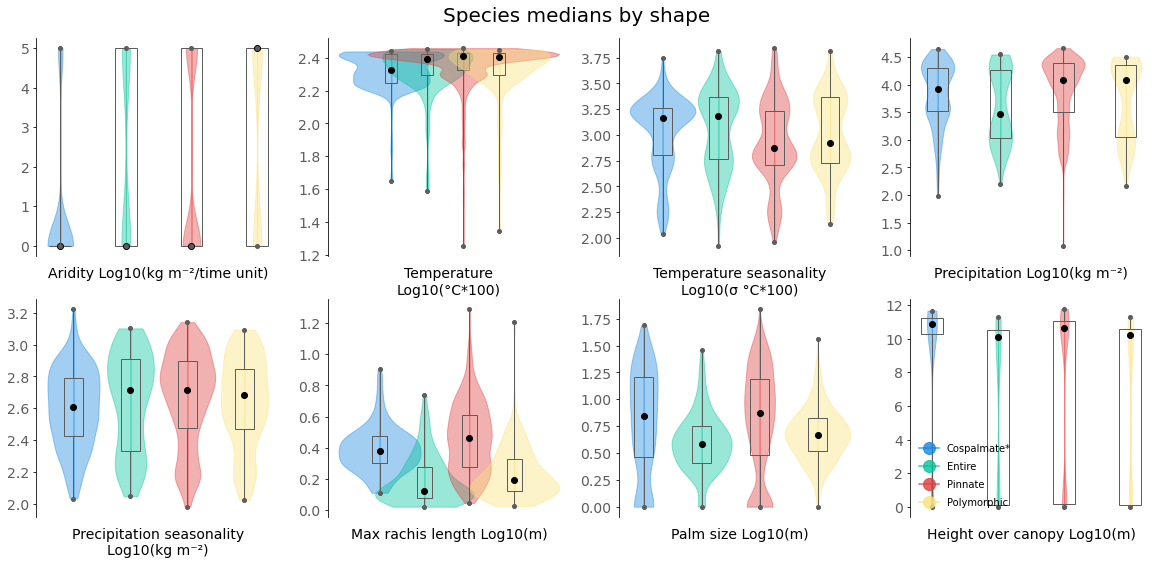

In [17]:
cols=4
rows=2

fig=plt.figure(figsize=(10*(rows),2.2*(cols)),facecolor='w')
fig.suptitle('Species medians by shape', size=20,y=0.93,fontname='arial')
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.2, hspace=0.2) # nrows, ncols
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

shape_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'variable':"#fbe279"}

width=1
linewidth=1
alpha=0.4
boxcolor='#5e5d5d'

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
        kde_plot(x,temp[variables[xx]],alpha=alpha,edgecolor=shape_colour_dict[shape],
                 facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
        # boxes
        boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.yticks(fontsize=14, color=boxcolor)
        plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        x+=3
        
for xx in range(4,8,1):
    ax=plt.subplot(outer_grid[1,xx-4])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
        kde_plot(x,temp[variables[xx]],alpha=alpha,edgecolor=shape_colour_dict[shape],
                 facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
        # boxes
        boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.yticks(fontsize=14, color=boxcolor)
        plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        x+=3
    if xx == 7:
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='o',color=value,label=shape_text_dict[key],markersize=12,alpha=0.8))
        ax.legend(handles=legend_elements, loc=3,labelspacing=0.8,frameon=False)
    ax.plot()
# plt.savefig('../figures/Fig_boxplots_20220908.pdf',dpi=300)
plt.show()

In [18]:
intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).reset_index()

shape      CHELSA_ai  CHELSA_bio1  CHELSA_bio4  CHELSA_bio12  \
0  cospalmate       1.000000        211.5  1474.000000     8227.0000   
1      entire       1.000000        246.5  1514.000000     2940.0000   
2     pinnate       1.000000        257.0   750.491839    12194.9836   
3    variable  100000.025091        252.5   836.000000    12243.0000   

   CHELSA_bio15  Max_Rachis_Length_m  StemHeightBladeLength  HeightOverCanopy  
0    405.000000             2.400000               7.000000      7.000000e+10  
1    521.000000             1.329962               3.819987      1.350000e+10  
2    518.499759             2.900000               7.389993      4.064997e+10  
3    481.500000             1.550000               4.614997      1.750000e+10

In [80]:
# # summary=intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).reset_index().rename(mapper, axis=1).copy(deep=True)
mapper=dict(zip([x for x in variables],['%s_median'%(x) for x in variables]))
summarymedian=intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).rename(mapper, axis=1)#.copy(deep=True)
mapper=dict(zip([x for x in variables],['%s_min'%(x) for x in variables]))
summarymin=intree.groupby(by='shape')[variables].min().apply(lambda x: 10**x).rename(mapper, axis=1)#.reset_index()#.copy(deep=True)
mapper=dict(zip([x for x in variables],['%s_max'%(x) for x in variables]))
summarymax=intree.groupby(by='shape')[variables].max().apply(lambda x: 10**x).rename(mapper, axis=1)#.reset_index()#.copy(deep=True)

summary=pd.concat([summarymin,summarymedian,summarymax],axis=1,sort=True)

for col in variables:
    summary.loc[summary.index,'%s_range'%(col)]=summary['%s_max'%(col)]-summary['%s_min'%(col)]
summary.T.astype('int').to_csv('../data_files/variable_summary-by_shape_20220822.csv',sep='\t')
summary.T.astype('int')


shape                           cospalmate        entire       pinnate  \
CHELSA_ai_min                            1             1             1   
CHELSA_bio1_min                         44            38            17   
CHELSA_bio4_min                        109            83            92   
CHELSA_bio12_min                        96           160            12   
CHELSA_bio15_min                       108           111            96   
Max_Rachis_Length_m_min                  1             1             1   
StemHeightBladeLength_min                1             1             1   
HeightOverCanopy_min                     1             1             1   
CHELSA_ai_median                         1             1             1   
CHELSA_bio1_median                     211           246           257   
CHELSA_bio4_median                    1473          1514           750   
CHELSA_bio12_median                   8226          2939         12194   
CHELSA_bio15_median                    405           521           518   
Max_Rachis_Length_m_median               2             1             2   
StemHeightBladeLength_median             7             3             7   
HeightOverCanopy_median        70000000001   13500000001   40649969250   
CHELSA_ai_max                       100003        100002        100003   
CHELSA_bio1_max                        274           284           287   
CHELSA_bio4_max                       5608          6536          6972   
CHELSA_bio12_max                     44538         35491         46257   
CHELSA_bio15_max                      1670          1263          1382   
Max_Rachis_Length_m_max                  8             5            19   
StemHeightBladeLength_max               48            28            69   
HeightOverCanopy_max          471000000000  200000000000  582000000001   
CHELSA_ai_range                     100002        100001        100002   
CHELSA_bio1_range                      229           245           269   
CHELSA_bio4_range                     5499          6452          6880   
CHELSA_bio12_range                   44442         35330         46245   
CHELSA_bio15_range                    1562          1151          1286   
Max_Rachis_Length_m_range                6             4            18   
StemHeightBladeLength_range             47            27            68   
HeightOverCanopy_range        470999999999  199999999999  582000000000   

shape                             variable  
CHELSA_ai_min                            1  
CHELSA_bio1_min                         21  
CHELSA_bio4_min                        136  
CHELSA_bio12_min                       144  
CHELSA_bio15_min                       106  
Max_Rachis_Length_m_min                  1  
StemHeightBladeLength_min                1  
HeightOverCanopy_min                     1  
CHELSA_ai_median                    100000  
CHELSA_bio1_median                     252  
CHELSA_bio4_median                     835  
CHELSA_bio12_median                  12242  
CHELSA_bio15_median                    481  
Max_Rachis_Length_m_median               1  
StemHeightBladeLength_median             4  
HeightOverCanopy_median        17500000001  
CHELSA_ai_max                       100002  
CHELSA_bio1_max                        281  
CHELSA_bio4_max                       6483  
CHELSA_bio12_max                     32427  
CHELSA_bio15_max                      1240  
Max_Rachis_Length_m_max                 16  
StemHeightBladeLength_max               36  
HeightOverCanopy_max          193400000001  
CHELSA_ai_range                     100001  
CHELSA_bio1_range                      259  
CHELSA_bio4_range                     6347  
CHELSA_bio12_range                   32282  
CHELSA_bio15_range                    1134  
Max_Rachis_Length_m_range               14  
StemHeightBladeLength_range             35  
HeightOverCanopy_range        193400000000